# Heart Disease Prediction with a Machine Learning/Deep Learning Models

Summary:

This notebook utilizes multiple Python-based machine learning libraries, in combination with a patient's medical attributes, to create a machine learning model for predicting heart disease.  I was able to achieve a cross-validated accuracy of close to 84% with [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression). A simple deep learning model -- as a quick sanity check -- was also employed to obtain an accuracy of 86.7%. The biggest predictors for heart disease were the patient's maximum heart rate during investigation, Thalassemia diagnosis, and the outcome of fluoroscopy characterization.

Outline of the notebook:

1. Problem Statement
2. Data Source
3. Evaluation Metrics
4. Data Analysis
5. Modeling Data and Results
6. Conclusions


### 1. Problem Statement: 

Predicting whether or not a patient has heart disease (a binary classification problem) based on their medical attributes.

### 2. Data

Data was obtained via [Kaggle](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci) based on a data set provided by Heart Disease Cleaveland UCI.

### 3. Evaluation Metrics

Goal: Best possible accuracy.  I will be using [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), a [K-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), and a [random forest algorithm](https://en.wikipedia.org/wiki/Random_forest) as my models; I will also use a simple deep learning model as another reference.

### 4. Data Analysis

**Data dictionary**

13 attributes are listed from the data as follows:

Age: Age of patient
Sex:

    0: Female
    1: Male

Chest Pain Type:

    0: Typical Angina
    1: Atypical Angina
    2: Non-Anginal Pain
    3: Asymptomatic

Resting Blood Pressure: Person's resting blood pressure.

[Cholesterol](https://en.wikipedia.org/wiki/Cholesterol): Serum Cholesterol in mg/dl

Fasting [Blood Sugar](https://en.wikipedia.org/wiki/Blood_sugar_level):

    0:Less Than 120mg/ml
    1: Greater Than 120mg/ml

Resting [Electrocardiographic](https://en.wikipedia.org/wiki/Electrocardiography) Measurement:

    0: Normal
    1: ST-T Wave Abnormality
    2: Left Ventricular Hypertrophy

Max Heart Rate Achieved: Maximum Heart Rate Achieved
Exercise Induced Angina:

    1: Yes
    0: No

ST Depression: ST depression induced by exercise relative to rest.
Slope: Slope of the peak exercise ST segment:

    0: Upsloping
    1: Flat
    2: Downsloping

[Thalassemia](https://en.wikipedia.org/wiki/Thalassemia): an inherited blood disorder that causes your body to have less hemoglobin than normal

    0: Normal
    1: Fixed Defect
    2: Reversable Defect

Number of Major Vessels: Number of major vessels colored by [fluoroscopy](https://en.wikipedia.org/wiki/Fluoroscopy) (a procedire used to help the healthcare provider see the flow of blood through the coronary arteries).


In [2]:
# Will use Numpy, pandas, and Matplotlib to explore the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Models from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


#Models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data
"""
Note: for file location check the data folder of this project or you can get the data from Kaggle.
"""

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart data/heart_cleveland_upload.csv")
df.shape

# data has 297 rows/14 columns

(297, 14)

In [4]:
## Exploratory Data Analysis

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [ ]:
df["condition"].value_counts()
"""
Note: 0 = no heart disease; 1= heart disease

""";

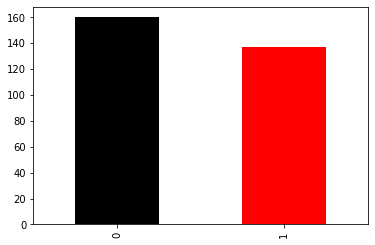

In [ ]:
df["condition"].value_counts().plot(kind="bar", color=["black","red"]);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
df.isna().sum()
# no missing values

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
df["thalach"].value_counts()

162    11
163     9
160     9
152     8
172     7
       ..
192     1
202     1
167     1
97      1
195     1
Name: thalach, Length: 91, dtype: int64

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


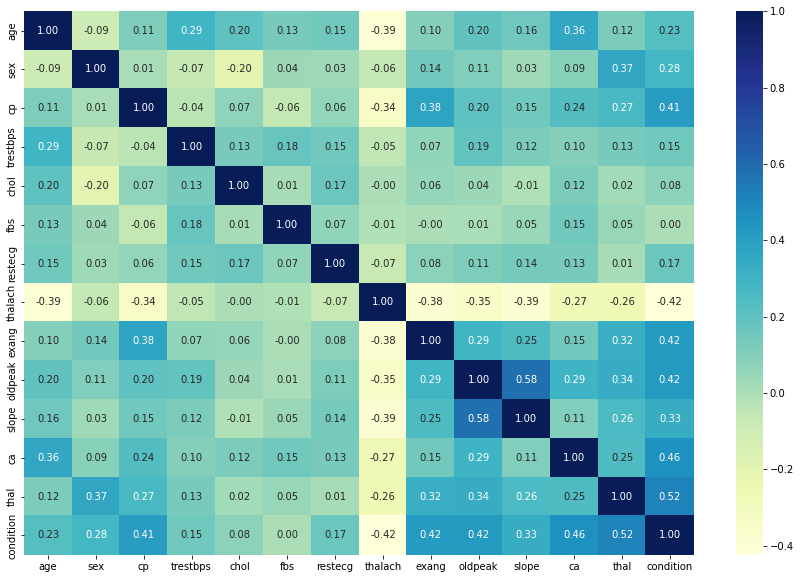

In [ ]:
# Correlation matrix inside heatmap

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 fmt =".2f",
                 cmap = "YlGnBu")

# Notes
"""
Greatest positive corrlation w/ heart disease: cp, thalach, slop
Greastest negative correlation w/ heart disease: exang, oldpeak, ca
""";

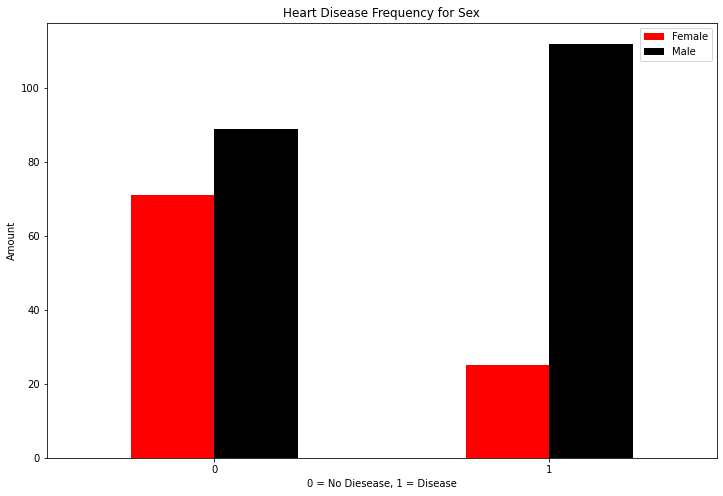

In [ ]:
# Create a plot of crosstab
pd.crosstab(df.condition, df.sex).plot(kind="bar",
                                    figsize=(12, 8),
                                    color=["red", "black"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

# Notes

"""
Data is biased to have more men w/ heart disaese vs no heart diesase than women
""";

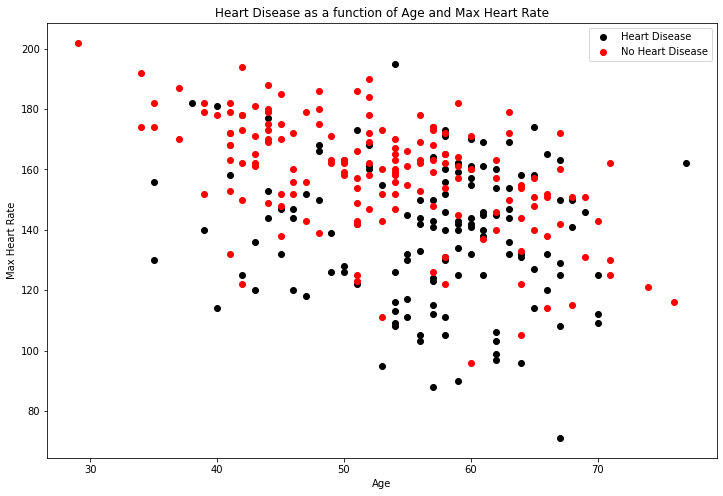

In [ ]:
# Age and Max Heart Rate


plt.figure(figsize=(12, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.condition==1],
            df.thalach[df.condition==1],
            c="black")

# Scatter with negative examples
plt.scatter(df.age[df.condition==0],
            df.thalach[df.condition==0],
            c="red")

# Add some helpful info
plt.title("Heart Disease as a function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "No Heart Disease"])

# Notes
"""
Results appear similar for heart disease/no heart disase.
Max heart rate decerases with age for both situaitons.
""";

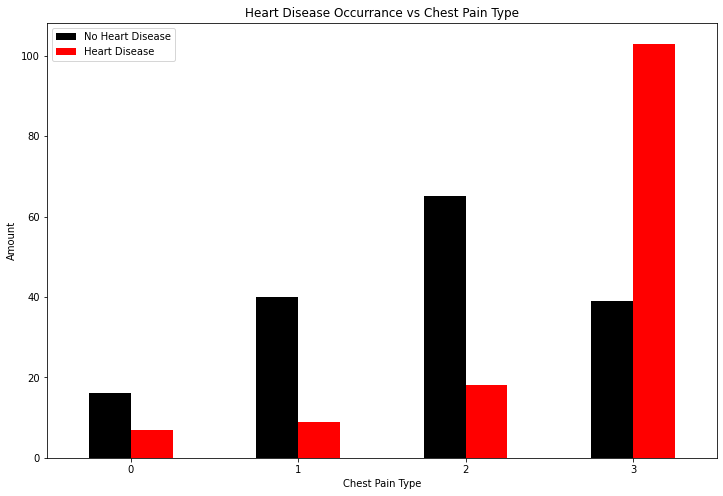

In [ ]:
# Heart disease as a function of chest pain

pd.crosstab(df.cp, df.condition).plot(kind="bar",
                                   figsize=(12, 8),
                                   color=["black", "red"])

# Add some communication
plt.title("Heart Disease Occurrance vs Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=0);

# Notes
"""
Greater chest pains are associated with heart disease
""";

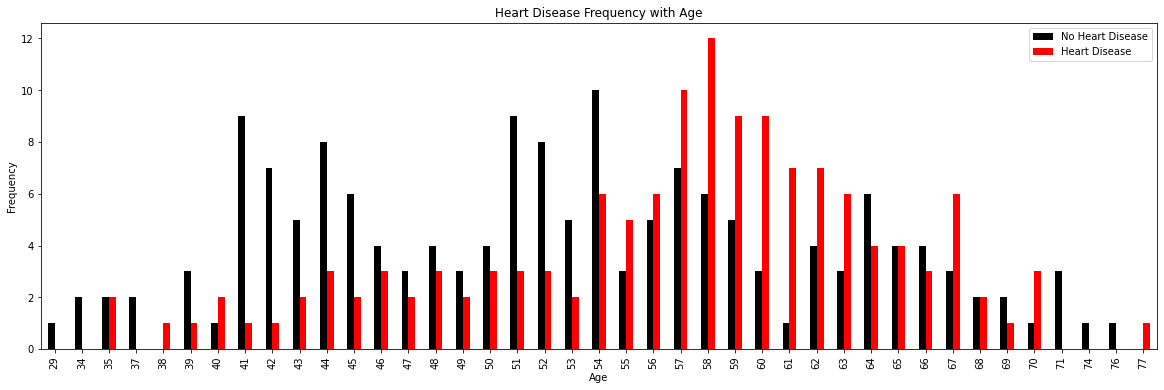

In [ ]:
# Heart disease frequency with age
pd.crosstab(df.age,df.condition).plot(kind="bar",
                                      figsize=(20,6),
                                      color=["black", "red"])
plt.title('Heart Disease Frequency with Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

## 5 Modeling Data

### Normalizing the data

In [6]:
# Normalize values to be between 0 and 1

df["age"] = df["age"]/77
df["cp"] = df["cp"]/3
df["trestbps"] = df["trestbps"]/200
df["chol"] = df["chol"]/564
df["restecg"] = df["restecg"]/2
df["thalach"] = df["thalach"]/202
df["oldpeak"] = df["oldpeak"]/6.2
df["slope"] = df["slope"]/2
df["ca"] = df["ca"]/3
df["thal"] = df["thal"]/2

In [7]:
# Splitting data into X and y

X = df.drop("condition", axis=1)
y = df["condition"]

In [8]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.896104,1,0.0,0.80,0.414894,1,1.0,0.648515,0,0.016129,0.5,0.333333,0.0
1,0.896104,0,0.0,0.70,0.423759,0,0.0,0.747525,0,0.290323,0.0,0.666667,0.0
2,0.857143,0,0.0,0.75,0.400709,0,0.0,0.564356,0,0.419355,1.0,0.000000,0.0
3,0.844156,1,0.0,0.69,0.500000,1,1.0,0.861386,0,0.225806,0.5,0.333333,0.0
4,0.831169,1,0.0,0.55,0.374113,0,1.0,0.712871,1,0.290323,0.5,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.519481,1,1.0,0.76,0.395390,0,0.0,0.896040,0,0.000000,0.0,0.000000,1.0
293,0.506494,1,1.0,0.59,0.388298,0,0.0,0.693069,0,0.193548,0.5,0.000000,1.0
294,0.454545,1,1.0,0.60,0.351064,0,0.0,0.643564,1,0.258065,0.5,0.000000,1.0
295,0.454545,0,1.0,0.69,0.324468,0,0.0,0.900990,0,0.225806,0.0,0.000000,0.0


In [9]:
y

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64

In [10]:
# Split data into train and test sets
np.random.seed(1)

#Splits

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [11]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
159,0.883117,1,1.000000,0.720,0.342199,1,0.0,0.698020,0,0.548387,0.5,0.666667,1.0
107,0.701299,1,0.666667,0.625,0.484043,0,1.0,0.752475,0,0.080645,1.0,0.333333,0.0
219,0.753247,0,1.000000,0.850,0.398936,1,1.0,0.722772,1,0.451613,0.5,0.666667,0.5
217,0.753247,1,1.000000,0.730,0.386525,0,0.0,0.519802,0,0.322581,0.5,0.333333,1.0
39,0.727273,1,0.333333,0.650,0.391844,0,1.0,0.806931,0,0.000000,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.779221,1,1.000000,0.585,0.407801,1,0.0,0.792079,1,0.225806,0.0,0.666667,1.0
255,0.675325,1,1.000000,0.640,0.452128,0,0.0,0.797030,1,0.000000,0.0,0.333333,1.0
72,0.987013,0,0.666667,0.700,0.349291,0,0.5,0.574257,0,0.177419,0.5,0.000000,0.0
235,0.727273,1,1.000000,0.650,0.501773,1,1.0,0.509901,1,0.258065,1.0,0.000000,1.0


In [12]:
y_train

159    1
107    0
219    1
217    1
39     0
      ..
203    1
255    1
72     0
235    1
37     0
Name: condition, Length: 237, dtype: int64

3 models to test for best accuracy
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [13]:
# Models in a dictionary for simplicity

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier()}

# Funtion to train and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates machine learning models.
    models : a dictionary of three different sci-kit learning models
    X_train = training data
    X_test = test data
    y_train = training labels
    y_test = test labels
    '''
    
    # Set Random Seed
    np.random.seed(1)
    # make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
        

In [14]:
model_scores = fit_and_score(models=models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

{'KNN': 0.7666666666666667,
 'Logistic Regression': 0.8666666666666667,
 'Random Forest Classifier': 0.85}

### Initial Model Comparison

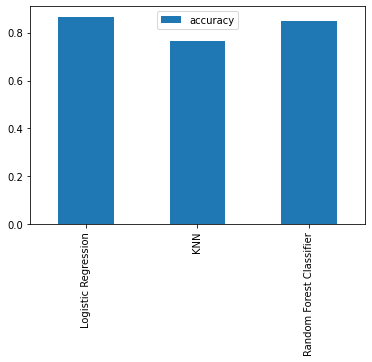

In [15]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot.bar();

### Hyperparameter Tuning

In [16]:
# KNN tuning

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# KNN instance setup
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

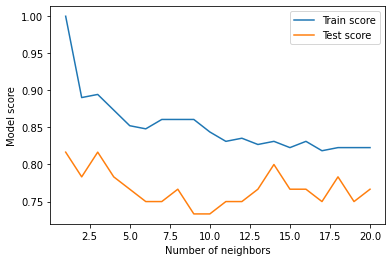

In [17]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

In [18]:
# Create hyperparamater grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4,4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [19]:
# Tune Logisitic Regression 
np.random.seed(42)

# Set up random hyperparamater search for logistic regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search for model logisticregression

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [20]:
rs_log_reg.score(X_test, y_test)

#Comment: tuned looks just as good as out-of-the-box value

0.8166666666666667

In [21]:
# RandomForest tuning

np.random.seed(42)

# Set up random hyperpameter search

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv = 5,
                           n_iter=20,
                           verbose = True)

# Fit random hyperparamter search for RandomForestClassifier()

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [22]:
rs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 210}

In [23]:
rs_rf.score(X_test, y_test)

0.8666666666666667

In [24]:
# different hyperparameters for our logisticregression model

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Set up grid hyperparamater search for logisitic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv = 5,
                          verbose=True)

# Fit grid hyperparamater search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [25]:
# best aparm

gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [26]:
# eval the grid search model

gs_log_reg.score(X_test,y_test)

0.8166666666666667

### Evaluate tuned machine learning classifiers beyond accuracy
* ROC
* confusion matrix
* classification report
* precision
* recall
* f1-score

In [27]:
# Make predictions w/ tuned model

y_predict = gs_log_reg.predict(X_test)
y_predict

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


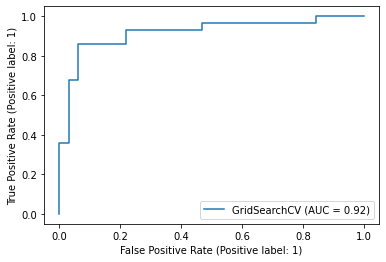

In [28]:
plot_roc_curve(gs_log_reg, X_test, y_test);

In [29]:
# Confusion Matrix
print(confusion_matrix(y_test,y_predict))

[[25  7]
 [ 4 24]]


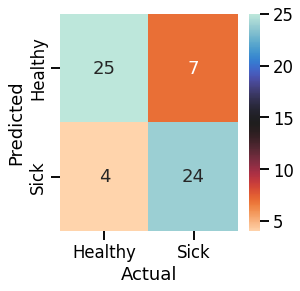

In [30]:
sns.set_context("talk")
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_predict), 
             annot=True, 
             xticklabels=["Healthy", "Sick"], 
             yticklabels=["Healthy", "Sick"], 
             fmt="g", 
             cmap="icefire_r")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

In [31]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.77      0.86      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



### Calculate evaluation metrics using cross-validation



In [32]:
# Check best hyperparams

gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [33]:
# Create a new classifier w/ best parameters

clf = LogisticRegression(C=0.20433597178569418,
                         solver = "liblinear")

In [34]:
# Cross-validated accuracy

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8217514124293785

In [35]:
# Cross-validated precision

cv_pres = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="precision")

cv_pres = np.mean(cv_pres)
cv_pres

0.8196691480562448

In [36]:
# Cross-validated recall

cv_recall = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.7904761904761906

In [37]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.7918860235325014

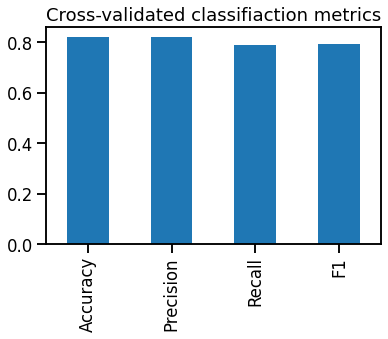

In [39]:
# Vizualize cross-validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_pres,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classifiaction metrics", legend=False);

### Most important features for the prediction of heart disease

In [40]:
# Fit an instance of Logistic Regression

clf = LogisticRegression(C=0.20433597178569418,
                         solver = "liblinear")

clf.fit(X_train,y_train);

In [41]:
# Check coef_

clf.coef_

array([[-0.25716648,  0.41149118,  0.64215578, -0.33193545, -0.25422391,
        -0.16563454,  0.16952395, -0.938699  ,  0.75977917,  0.38035764,
         0.36923146,  1.1466392 ,  1.18874048]])

In [42]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.2571664777034556,
 'ca': 1.14663919844345,
 'chol': -0.2542239115427362,
 'cp': 0.6421557811107458,
 'exang': 0.7597791712331309,
 'fbs': -0.1656345383559863,
 'oldpeak': 0.3803576441373775,
 'restecg': 0.16952394615611766,
 'sex': 0.411491184986395,
 'slope': 0.3692314576008491,
 'thal': 1.188740481747938,
 'thalach': -0.9386990033981412,
 'trestbps': -0.3319354469817254}

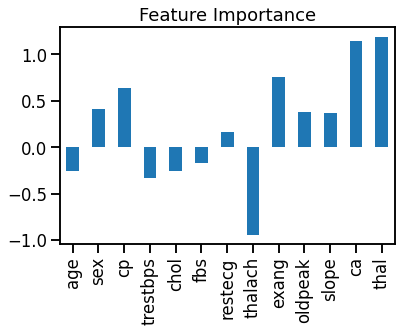

In [43]:
# Vizualize most important features
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

## Deep Learning Model: A Sanity Check

This model will serve as a quick sanity check to the previous machine learning models.
A simple deep learning model will be employed on the data to see if the results are similar to the aforementioned cross-validated accuracy.  


In [56]:
import tensorflow as tf



# Set random seed
tf.random.set_seed(1)

# Simple model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
model_1.fit(X_train, y_train, epochs=500, verbose=0)


In [57]:
# Evaluate our model on the test set
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

2/2 [==============================] - 0s 8ms/step - loss: 0.3620 - accuracy: 0.8667
Model loss on the test set: 0.36201006174087524
Model accuracy on the test set: 86.67%


### 6. Conclusions

With the data provided, I was able to achieve accuracy of close to 84% with logistic regression that was cross-validated.  A simple deep learning model was also employed to obtain an accuracy of 86.67%.  This simple deep learning model was also trained between 100 to 1000 epochs and produced similiar results.  The biggest predictors for heart disease were the patient's maximum heart rate during investigation, Thalassemia diagnosis, and the outcome of fluoroscopy characterization.

Possible ways to improve improve model:
    
    1. Collect more data (<300 pts): Data is heavily skewed w/ older males having heart disease and having a greater sample set might improve the model and outcome.
    2. Improve current model with even more fine tuning; this is highly unlikely to improve significantly given the results of our deep learning model.
